In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Different fonts in credit card digit

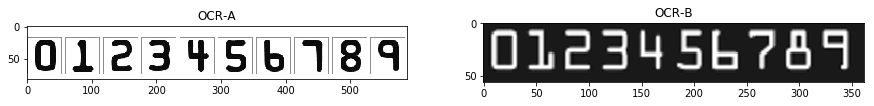

In [15]:
plt.figure(figsize = (15 , 7 ) )

plt.subplot( 1 , 2 , 1 )
plt.title('OCR-A')
cc1 = cv2.imread('creditcard_digits1.jpg', 0)
plt.imshow( cc1 , cmap = 'gray' )

plt.subplot( 1 , 2 , 2 )
plt.title('OCR-B')
cc2 = cv2.imread('creditcard_digits2.jpg', 0)
plt.imshow( cc2 , cmap = 'gray' )

plt.show()

- Note the differences, especially in the 1, 7 and 8

#### Apply Threshold binarization

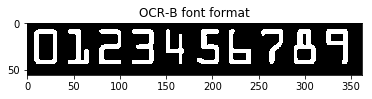

In [14]:
cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title('OCR-B font format')
plt.imshow( th2 , cmap = 'gray' )

# Creating our Dataset Directories

In [2]:
import os

def makedir(directory):
    """Creates a new directory if it does not exist"""
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None, 0
    
for i in range(0,10):
    directory_name = "./credit_card/train/"+str(i)
    print(directory_name)
    makedir(directory_name) 

for i in range(0,10):
    directory_name = "./credit_card/test/"+str(i)
    print(directory_name)
    makedir(directory_name)

./credit_card/train/0
./credit_card/train/1
./credit_card/train/2
./credit_card/train/3
./credit_card/train/4
./credit_card/train/5
./credit_card/train/6
./credit_card/train/7
./credit_card/train/8
./credit_card/train/9
./credit_card/test/0
./credit_card/test/1
./credit_card/test/2
./credit_card/test/3
./credit_card/test/4
./credit_card/test/5
./credit_card/test/6
./credit_card/test/7
./credit_card/test/8
./credit_card/test/9


In [3]:
os.listdir( 'credit_card/' )

['test', 'train']

# Creating our Data Augmentation Functions

In [4]:
import cv2
import numpy as np 
import random
import cv2
from scipy.ndimage import convolve

We've created 5 functions here, let's discuss each:

DigitAugmentation() - This one simply uses the other image manipulating functions, but calls them randomly. Examine to code to see how it's done.

add_noise() - This function introduces some noise elements to the image

pixelate() - This function re-sizes the image then upscales/upsamples it. This degrades the quality and is meant to simulate blur to the image from either a shakey or poor quality camera.

stretch() - This simulates some variation in re-sizing where it stretches the image to a small random amount

pre_process() - This is a simple function that applies OTSU Binarization to the image and re-sizes it. We use this on the extracted digits. To create a clean dataset akin to the MNIST style format.

In [5]:
def add_noise(image):
    """Addings noise to image"""
    prob = random.uniform(0.01, 0.05)
    rnd = np.random.rand(image.shape[0], image.shape[1])
    noisy = image.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return noisy

def pixelate(image):
    "Pixelates an image by reducing the resolution then upscaling it"
    dim = np.random.randint(8,12)
    image = cv2.resize(image, (dim, dim), interpolation = cv2.INTER_AREA)
    image = cv2.resize(image, (16, 16), interpolation = cv2.INTER_AREA)
    return image

def stretch(image):
    "Randomly applies different degrees of stretch to image"
    ran = np.random.randint(0,3)*2
    if np.random.randint(0,2) == 0:
        frame = cv2.resize(image, (32, ran+32), interpolation = cv2.INTER_AREA)
        return frame[int(ran/2):int(ran+32)-int(ran/2), 0:32]
    else:
        frame = cv2.resize(image, (ran+32, 32), interpolation = cv2.INTER_AREA)
        return frame[0:32, int(ran/2):int(ran+32)-int(ran/2)]

def DigitAugmentation(frame, dim = 32):
    """Randomly alters the image using noise, pixelation and streching image functions"""
    frame = cv2.resize(frame, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    random_num = np.random.randint(0,9)

    if (random_num % 2 == 0):
        frame = add_noise(frame)
    if(random_num % 3 == 0):
        frame = pixelate(frame)
    if(random_num % 2 == 0):
        frame = stretch(frame)
    frame = cv2.resize(frame, (dim, dim), interpolation = cv2.INTER_AREA)

    return frame 


def pre_process(image, inv = False):
    """Uses OTSU binarization on an image"""
    try:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        gray_image = image
        pass
    
    if inv == False:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        _, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(th2, (32,32), interpolation = cv2.INTER_AREA)
    return resized

- We can test our augmentation by using this bit of code:

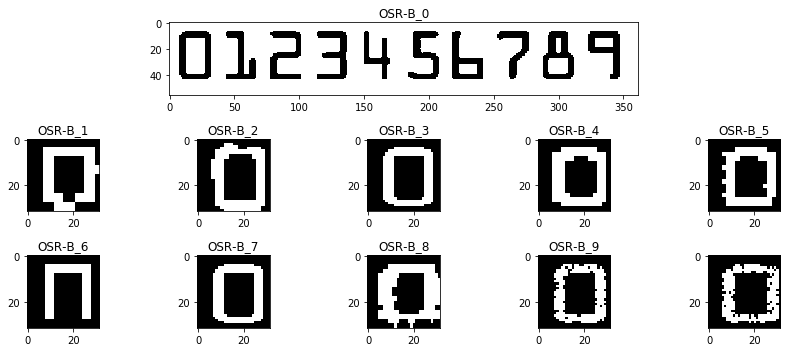

In [26]:
plt.figure( figsize = ( 12 , 5 ) )

cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.subplot( 3 , 1 , 1 )
plt.title('OCR-B font format')
plt.imshow( th2 , cmap = 'gray' )

# This is the coordinates of the region enclosing  the first digit
# This is preset and was done manually based on this specific image
region = [(0, 0), (35, 48)]

# Assigns values to each region for ease of interpretation
top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

k = 6

for i in range(0,1): #We only look at the first digit in testing out augmentation functions
    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    for j in range(0,10):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        plt.title('OSR-B_'+str(j))
        plt.subplot( 3 , 5 , k )
        plt.imshow( roi_otsu , cmap = 'gray')
        k = k + 1 

plt.tight_layout()
plt.show()

# Creating our dataset

### Creating 2000 Images for each digit in OSR-A font Image - TRAINING DATA

In [6]:
# Load our first image
cc1 = cv2.imread('creditcard_digits1.jpg', 0)

_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

region = [(2, 19), (50, 72)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 59
        bottom_right_x = bottom_right_x + 59

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_1_"+str(j)+".jpg", roi_otsu)


Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


# Creating 2000 Images for each digit in OSR-B - TRAINING DATA

In [7]:
cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

region = [(0, 0), (35, 48)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    if i > 0:
        # We jump the next digit each time we loop
        top_left_x = top_left_x + 35
        bottom_right_x = bottom_right_x + 35

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,2000):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        cv2.imwrite("./credit_card/train/"+str(i)+"./_2_"+str(j)+".jpg", roi_otsu)

Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


# Making our Test Data

In [8]:
# Creating 200 Images for each digit in creditcard_digits1 - TEST DATA

# Load our first image
cc1 = cv2.imread('creditcard_digits1.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

region = [(2, 19), (50, 72)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    # We jump the next digit each time we loop
    if i > 0:
        top_left_x = top_left_x + 59
        bottom_right_x = bottom_right_x + 59

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,200):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = True)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_1_"+str(j)+".jpg", roi_otsu)


Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9


In [9]:
cc1 = cv2.imread('creditcard_digits2.jpg', 0)
_, th2 = cv2.threshold(cc1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

region = [(0, 0), (35, 48)]

top_left_y = region[0][1]
bottom_right_y = region[1][1]
top_left_x = region[0][0]
bottom_right_x = region[1][0]

for i in range(0,10):   
    if i > 0:
        # We jump the next digit each time we loop
        top_left_x = top_left_x + 35
        bottom_right_x = bottom_right_x + 35

    roi = cc1[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
    print("Augmenting Digit - ", str(i))
    # We create 200 versions of each image for our dataset
    for j in range(0,200):
        roi2 = DigitAugmentation(roi)
        roi_otsu = pre_process(roi2, inv = False)
        cv2.imwrite("./credit_card/test/"+str(i)+"./_2_"+str(j)+".jpg", roi_otsu)


Augmenting Digit -  0
Augmenting Digit -  1
Augmenting Digit -  2
Augmenting Digit -  3
Augmenting Digit -  4
Augmenting Digit -  5
Augmenting Digit -  6
Augmenting Digit -  7
Augmenting Digit -  8
Augmenting Digit -  9
